## Exploratory Data Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.datasets import fetch_california_housing

In [2]:
data = fetch_california_housing()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data['target'])
y.name = 'Median House Value ($100000)'

In [3]:
# Basic information about features
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [4]:
# Summary statistics of features
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [5]:
# Number of unique values of features
X.nunique()

MedInc        12928
HouseAge         52
AveRooms      19392
AveBedrms     14233
Population     3888
AveOccup      18841
Latitude        862
Longitude       844
dtype: int64

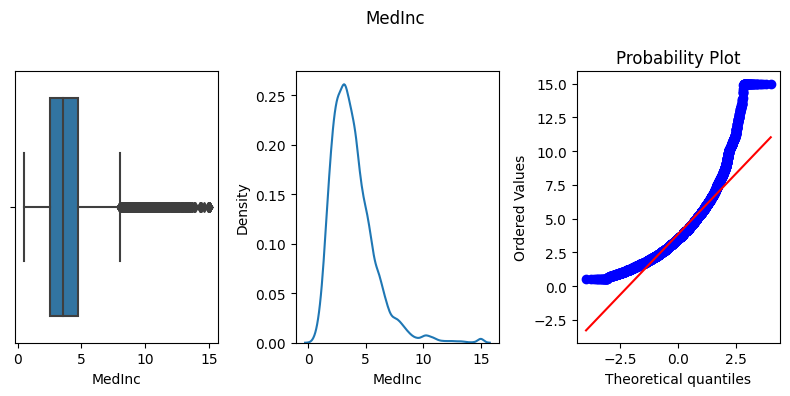

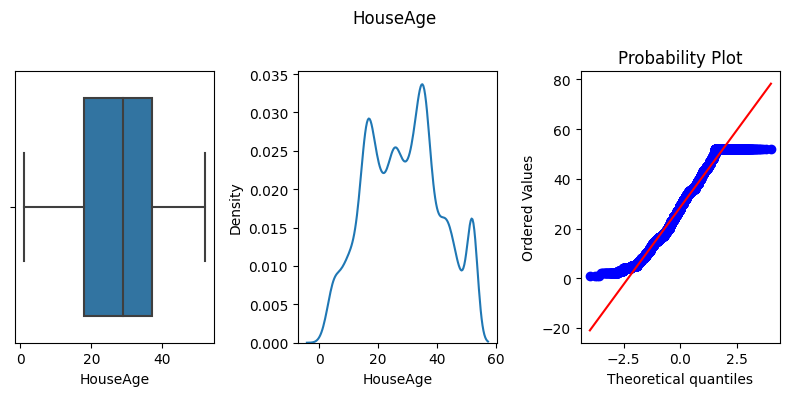

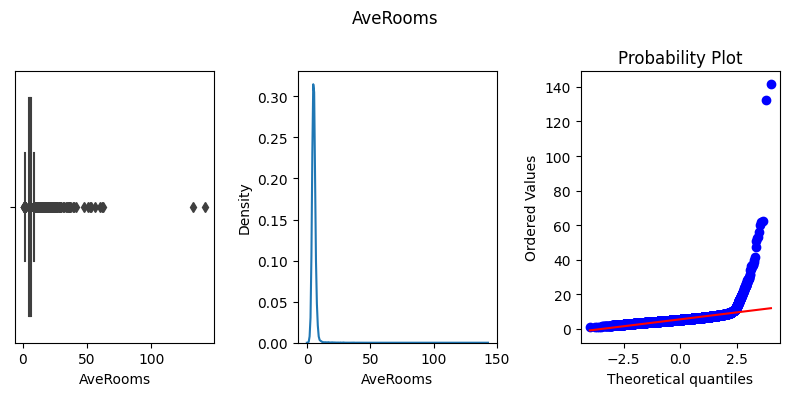

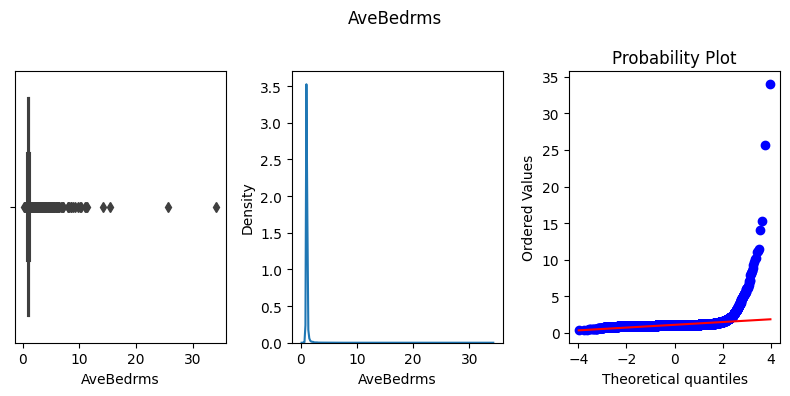

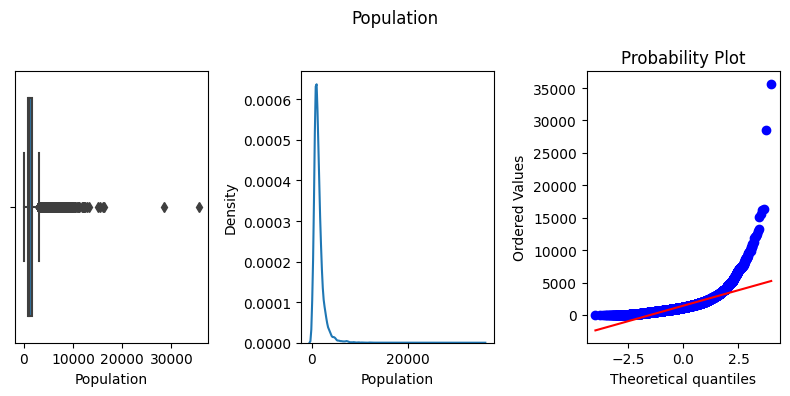

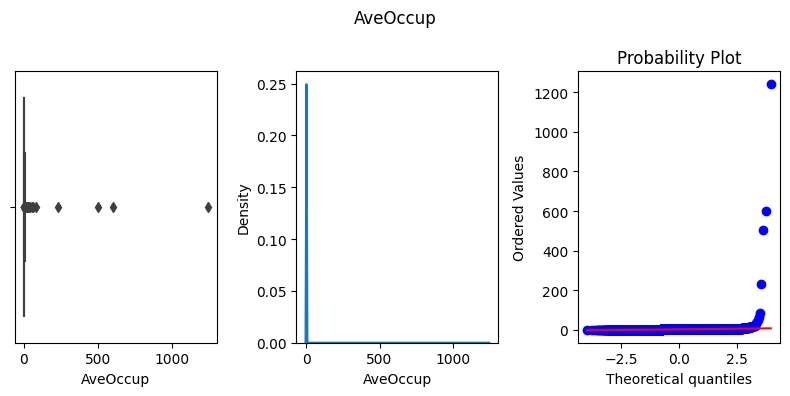

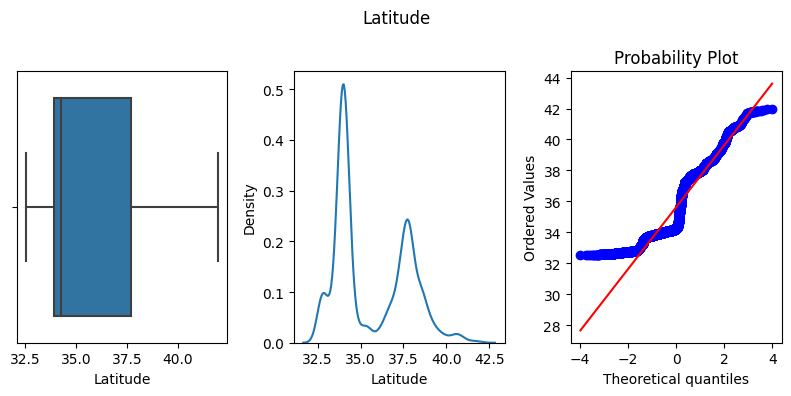

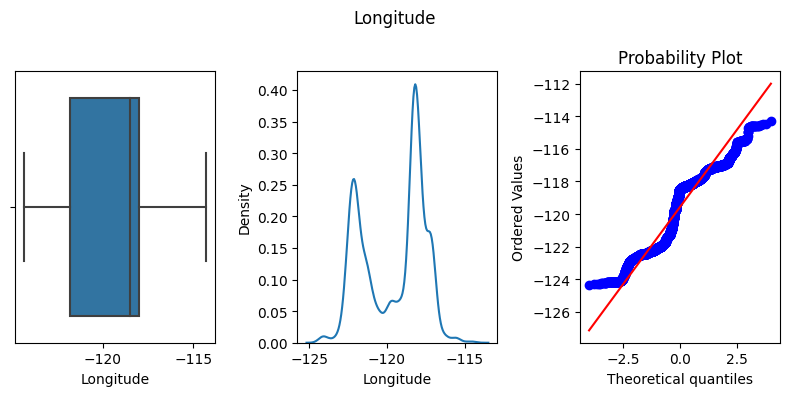

In [6]:
for col in X.columns:
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8,4))
    sns.boxplot(x = X[col],ax=ax[0])
    sns.kdeplot(x = X[col],ax=ax[1])
    st.probplot(X[col],plot=ax[2])
    plt.suptitle(col)
    fig.tight_layout()
    plt.show()

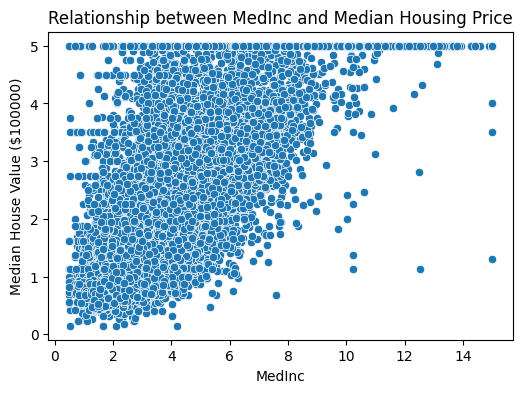

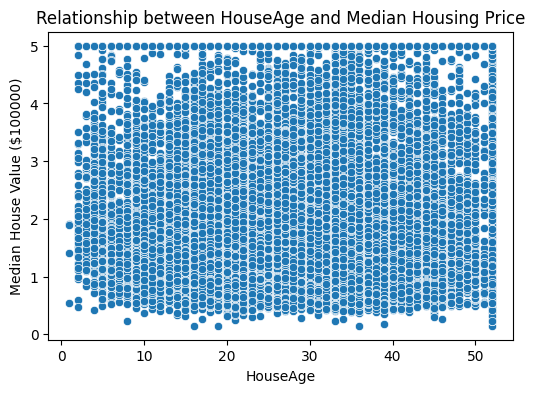

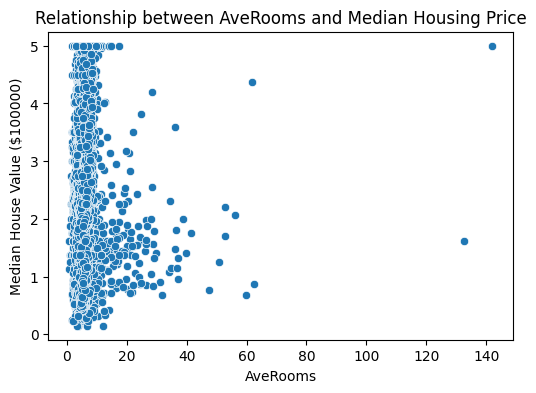

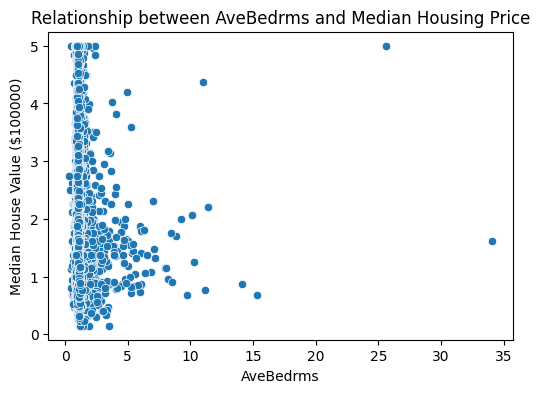

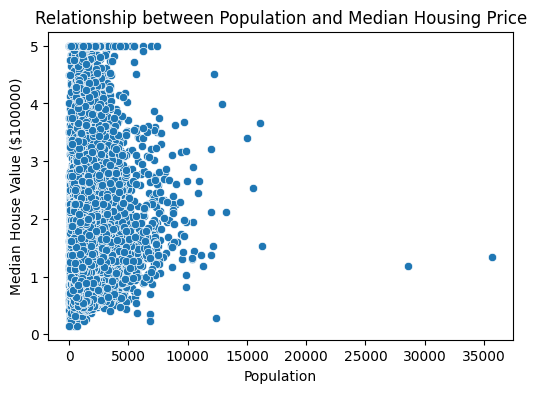

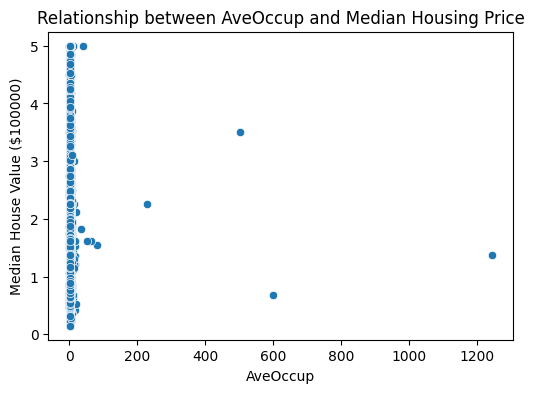

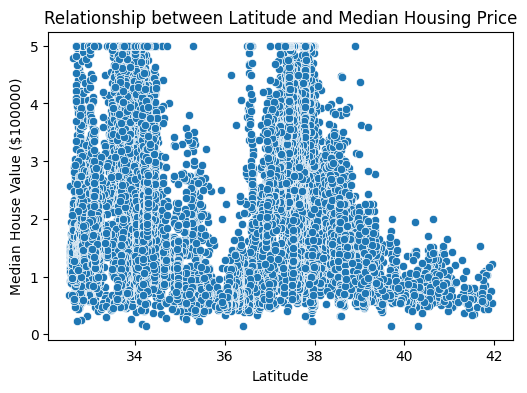

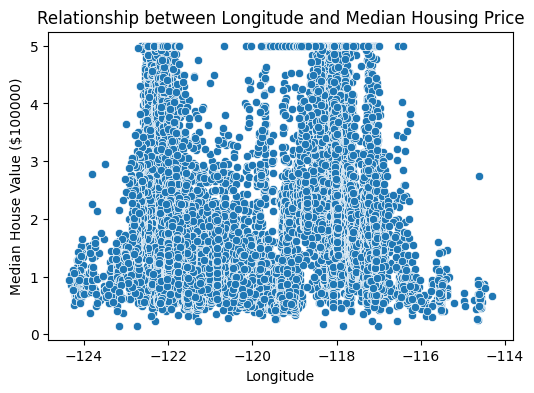

In [7]:
# Scatterplots between feature and target variable
for col in X.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=X[col],y=y)
    plt.title(f'Relationship between {col} and Median Housing Price')
    plt.show()

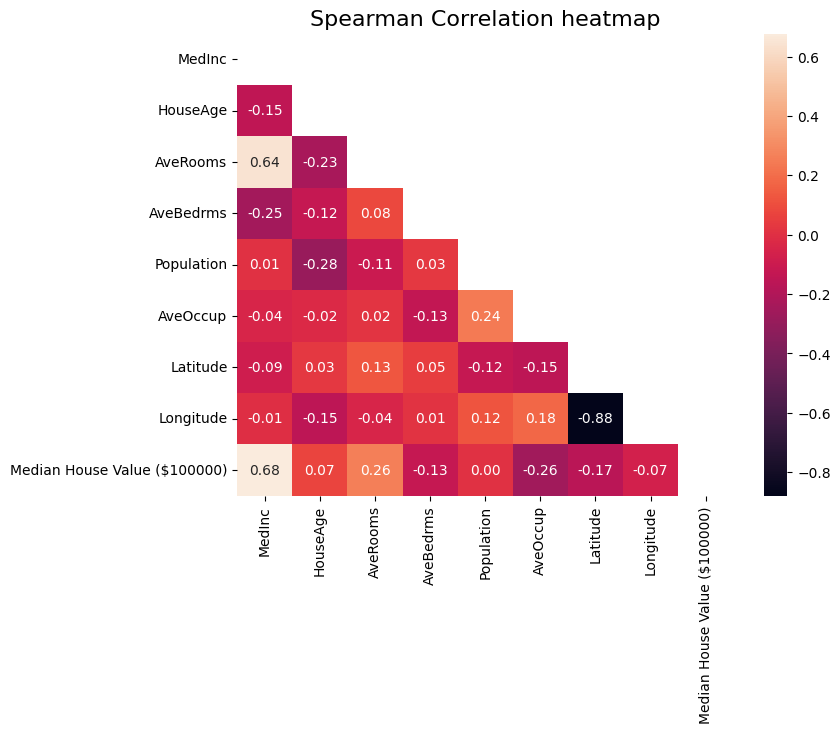

In [8]:
combined_data = pd.concat([X,y],axis=1)
correlation = combined_data.corr(method='spearman')
plt.figure(figsize=(8,6))
sns.heatmap(
    correlation, annot=True, mask = np.triu(np.ones_like(correlation, dtype=bool)),fmt='.2f',annot_kws={'fontsize':10})
plt.title('Spearman Correlation heatmap',size=16)
plt.show()

In [9]:
# Checking for duplicated rows
combined_data[combined_data.duplicated()]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Median House Value ($100000)
